#####AdiPokharna
# **Chit 5**

*Problem Statement:*

    Implement anomaly detection for given credit card dataset using Autoencoder and build the model by using the following steps:
    a.	Import required libraries
    b.	Upload / access the dataset
    c.	Encoder converts it into latent representation
    d.	Decoder networks convert it back to the original input
    e.	Compile the models with Optimizer, Loss, and Evaluation Metrics



#Credit Card Fraud Detection

Example of outlier detection with autoencoders. Dataset https://www.kaggle.com/mlg-ulb/creditcardfraud from Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles).

It is a highly unbalanced dataset with a very low percetnage of fraudulent credit card transactions. Our purpose is to build a classifier for detecting fraudulent transactions. In this example we will consider them as outliers an will use an autoencoder for detecting them.

##Downloading of dataset


In [1]:
!wget -O creditfraud.zip https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip creditfraud.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


##Loading libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense

##Loading dataset in Python and taking a first look

In [4]:
dat=pd.read_csv('creditcard.csv')
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset is highly unbalanced with very few fraudulent credit cards

In [5]:
dat['Class'].value_counts()/dat['Class'].count()

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot: xlabel='Class', ylabel='count'>

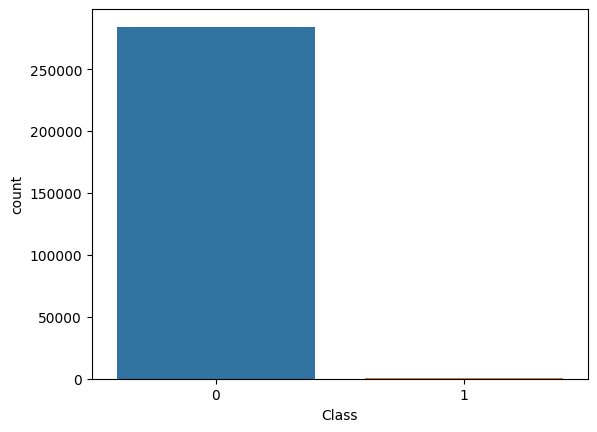

In [6]:
sns.countplot(x='Class',data=dat)

In [7]:
dat = dat.drop([ 'Time'], 1)
dat['Amount'] = StandardScaler().fit_transform(dat['Amount'].values.reshape(-1, 1))

C:\Users\akash\AppData\Local\Temp\ipykernel_14764\1485037447.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dat = dat.drop([ 'Time'], 1)


Splitting into train and test datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)

C:\Users\akash\AppData\Local\Temp\ipykernel_14764\3396225669.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)


In [9]:
y_test.value_counts()/y_test.count()

0    0.998294
1    0.001706
Name: Class, dtype: float64

In [10]:
y_train.value_counts()/y_train.count()

0    0.998251
1    0.001749
Name: Class, dtype: float64

##First method: using autoencoder's regression error

For our first example we will train our autoencoder only on non fraudulent cases

In [11]:
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]

Building an autoencoder with
- an input layer with 29 neurons,
- a hidden layer with 12 neurons,
- an output layer with 29 neurons

In [12]:
input_layer = Input(shape=(29, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(input_layer,decoded)

In [13]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
autoencoder.fit(X_train_normal, X_train_normal, epochs = 10, batch_size=128,
validation_data=(X_train_normal,X_train_normal))

Epoch 1/10
1111/1111 [==============================] - 3s 3ms/step - loss: 0.9958 - val_loss: 0.8847
Epoch 2/10
1111/1111 [==============================] - 3s 2ms/step - loss: 0.8600 - val_loss: 0.8417
Epoch 3/10
1111/1111 [==============================] - 3s 2ms/step - loss: 0.8310 - val_loss: 0.8222
Epoch 4/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.8162 - val_loss: 0.8108
Epoch 5/10
1111/1111 [==============================] - 3s 3ms/step - loss: 0.8068 - val_loss: 0.8031
Epoch 6/10
1111/1111 [==============================] - 3s 2ms/step - loss: 0.8001 - val_loss: 0.7973
Epoch 7/10
1111/1111 [==============================] - 4s 3ms/step - loss: 0.7948 - val_loss: 0.7925
Epoch 8/10
1111/1111 [==============================] - 4s 4ms/step - loss: 0.7907 - val_loss: 0.7890
Epoch 9/10
1111/1111 [==============================] - 5s 4ms/step - loss: 0.7878 - val_loss: 0.7865
Epoch 10/10
1111/1111 [==============================] - 6s 6ms/step - loss: 0.785

In [15]:
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_train})
error_df.groupby('true_class').describe()

4451/4451 [==============================] - 7s 2ms/step


reconstruction_error                                            \
                          count       mean        std       min       25%   
true_class                                                                  
0                      142154.0   0.784237   3.463613  0.036632  0.240924   
1                         249.0  30.073128  43.089322  0.160475  4.265788   

                                              
                  50%        75%         max  
true_class                                    
0            0.402660   0.661515  319.223607  
1           10.709603  27.313990  279.893035

As we can see above the error for non fraudulent case is lower than the error for fraudulent cases. We use a threshold of mean plus 3 sds to classify the test set.

In [16]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
y_pred=[(lambda er: 1 if er>=11.078922  else 0)(er) for er in mse]

4451/4451 [==============================] - 9s 2ms/step


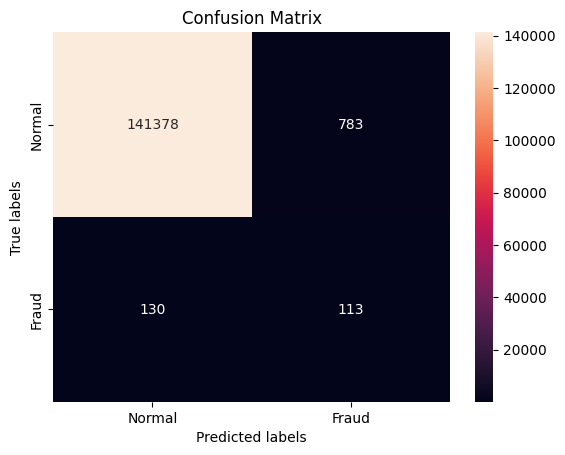

In [17]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2],
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

##Second method: using encoder part of autoencoder and k-NN

We train using all cases (fraud/non-fraud)in train dataset and use the result to map the instances into a 12-dimensional space. The mapped cases are fed to k-NN for classification.

In [18]:
input_layer_all = Input(shape=(29, ))
encoded_all = Dense(12,activation='tanh')(input_layer_all)
decoded_all = Dense(29,activation='sigmoid')(encoded_all)
autoencoder_all = Model(input_layer_all,decoded_all)
autoencoder_all.compile(optimizer='adam',loss='mean_squared_error')
autoencoder_all.fit(X_train, X_train, epochs = 10, batch_size=128,
validation_data=(X_train,X_train))

Epoch 1/10
1113/1113 [==============================] - 3s 3ms/step - loss: 1.0519 - val_loss: 0.9403
Epoch 2/10
1113/1113 [==============================] - 4s 3ms/step - loss: 0.9158 - val_loss: 0.8979
Epoch 3/10
1113/1113 [==============================] - 6s 5ms/step - loss: 0.8868 - val_loss: 0.8773
Epoch 4/10
1113/1113 [==============================] - 4s 3ms/step - loss: 0.8705 - val_loss: 0.8644
Epoch 5/10
1113/1113 [==============================] - 4s 3ms/step - loss: 0.8600 - val_loss: 0.8559
Epoch 6/10
1113/1113 [==============================] - 4s 3ms/step - loss: 0.8527 - val_loss: 0.8496
Epoch 7/10
1113/1113 [==============================] - 4s 4ms/step - loss: 0.8473 - val_loss: 0.8449
Epoch 8/10
1113/1113 [==============================] - 5s 4ms/step - loss: 0.8432 - val_loss: 0.8414
Epoch 9/10
1113/1113 [==============================] - 5s 5ms/step - loss: 0.8401 - val_loss: 0.8387
Epoch 10/10
1113/1113 [==============================] - 6s 5ms/step - loss: 0.837

In [19]:
encoder_all = Model(input_layer_all,encoded_all)
enc_all = encoder_all.predict(X_train)

4451/4451 [==============================] - 10s 2ms/step


Loading library for k-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [22]:
# Train the model using the training sets
knn_model.fit(enc_all,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
%%time
knn_predicted= knn_model.predict(encoder_all.predict(X_test))

4451/4451 [==============================] - 7s 2ms/step


In [ ]:
conf_matrix = metrics.confusion_matrix(y_test,knn_predicted)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2],
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))